# 01 Principal Component Analysis Example with "Hitters" Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
for i in range(1,101,10):
    df[i]=df["RBI"]*i

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,1,11,21,31,41,51,61,71,81,91
0,293,66,1,30,29,14,1,293,66,1,...,29,319,609,899,1189,1479,1769,2059,2349,2639
1,315,81,7,24,38,39,14,3449,835,69,...,38,418,798,1178,1558,1938,2318,2698,3078,3458
2,479,130,18,66,72,76,3,1624,457,63,...,72,792,1512,2232,2952,3672,4392,5112,5832,6552
3,496,141,20,65,78,37,11,5628,1575,225,...,78,858,1638,2418,3198,3978,4758,5538,6318,7098
4,321,87,10,39,42,30,2,396,101,12,...,42,462,882,1302,1722,2142,2562,2982,3402,3822


In [5]:
df.dropna(inplace = True)

In [6]:
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,1,11,21,31,41,51,61,71,81,91
1,315,81,7,24,38,39,14,3449,835,69,...,38,418,798,1178,1558,1938,2318,2698,3078,3458
2,479,130,18,66,72,76,3,1624,457,63,...,72,792,1512,2232,2952,3672,4392,5112,5832,6552
3,496,141,20,65,78,37,11,5628,1575,225,...,78,858,1638,2418,3198,3978,4758,5538,6318,7098
4,321,87,10,39,42,30,2,396,101,12,...,42,462,882,1302,1722,2142,2562,2982,3402,3822
5,594,169,4,74,51,35,11,4408,1133,19,...,51,561,1071,1581,2091,2601,3111,3621,4131,4641


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df = StandardScaler().fit_transform(df)

In [9]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca= PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [12]:
component_df = pd.DataFrame(data= pca_fit, columns=["first_component", "second_component"])
component_df

,first_component,second_component
0,-1.725199,1.598751
1,2.794658,-1.959995
2,4.320232,1.948871
3,-2.231985,-1.840532
4,0.782428,-0.035911
...,...,...
258,-0.323500,-0.227817
259,1.538936,2.293465
260,-1.353898,-0.948641
261,2.446521,-0.091569


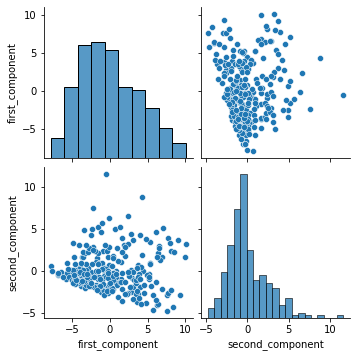

In [13]:
sns.pairplot(component_df)

In [14]:
pca.explained_variance_ratio_

array([0.5749451 , 0.20958585])

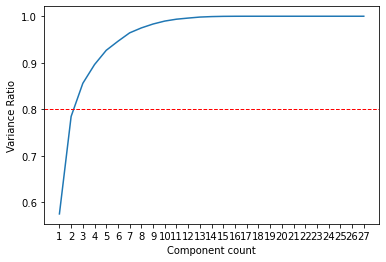

In [21]:
pca = PCA().fit(df)
x = range(1,28)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8, color='r', linestyle='--', linewidth=1)
plt.xticks(list(range(1,28)))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [17]:
pca.explained_variance_ratio_

array([5.74945103e-01, 2.09585851e-01, 7.12776665e-02, 4.02904588e-02,
       3.06604027e-02, 1.94258149e-02, 1.81147446e-02, 1.06132589e-02,
       8.38793022e-03, 6.32603711e-03, 4.03193017e-03, 2.40910765e-03,
       2.15967886e-03, 1.02399240e-03, 5.24758337e-04, 1.78733896e-04,
       4.45304581e-05, 1.09169221e-32, 3.75094492e-33, 3.75094492e-33,
       3.75094492e-33, 3.75094492e-33, 3.75094492e-33, 3.75094492e-33,
       3.75094492e-33, 3.75094492e-33, 1.34015651e-33])

In [18]:
pca=PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [19]:
pca.explained_variance_ratio_

array([0.5749451 , 0.20958585, 0.07127767])